In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# EDA

In [43]:
!wget https://github.com/JoserraSASG/Spotify_Trends_EDA_and_Regress/raw/main/spotify-2023.csv
# Attempting to load the dataset using 'ISO-8859-1' encoding
spotify_data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Displaying the first few rows of the dataset
spotify_data.head()


--2023-10-11 08:45:45--  https://github.com/JoserraSASG/Spotify_Trends_EDA_and_Regress/raw/main/spotify-2023.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoserraSASG/Spotify_Trends_EDA_and_Regress/main/spotify-2023.csv [following]
--2023-10-11 08:45:45--  https://raw.githubusercontent.com/JoserraSASG/Spotify_Trends_EDA_and_Regress/main/spotify-2023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106270 (104K) [text/plain]
Saving to: ‘spotify-2023.csv.2’

spotify-2023.csv.2  100%[===================>] 103.78K  --.-KB/s    in 0.003s  

2023-10-11 08:45:45 (37.9 MB/s) - ‘spotify-2023.csv

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Basics Statistics

In [5]:
# Getting a summary of the data
data_summary = spotify_data.describe(include='all')

# Displaying the data summary
data_summary

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953,953,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,...,953.000000,858,953,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
unique,943,645,NaN,NaN,NaN,NaN,NaN,NaN,949,NaN,...,NaN,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daylight,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,723894473,NaN,...,NaN,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,120,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,NaN,67.812172,...,122.540399,NaN,NaN,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,NaN,NaN,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,NaN,86.441493,...,28.057802,NaN,NaN,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,NaN,NaN,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,NaN,0.000000,...,65.000000,NaN,NaN,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,NaN,NaN,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,NaN,13.000000,...,100.000000,NaN,NaN,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,NaN,NaN,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,NaN,34.000000,...,121.000000,NaN,NaN,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,NaN,NaN,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,NaN,88.000000,...,140.000000,NaN,NaN,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000


In [6]:
# Checking for missing values in the dataset
missing_values = spotify_data.isnull().sum()

# Displaying the count of missing values for each column
missing_values

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

## Distribution of percentage features

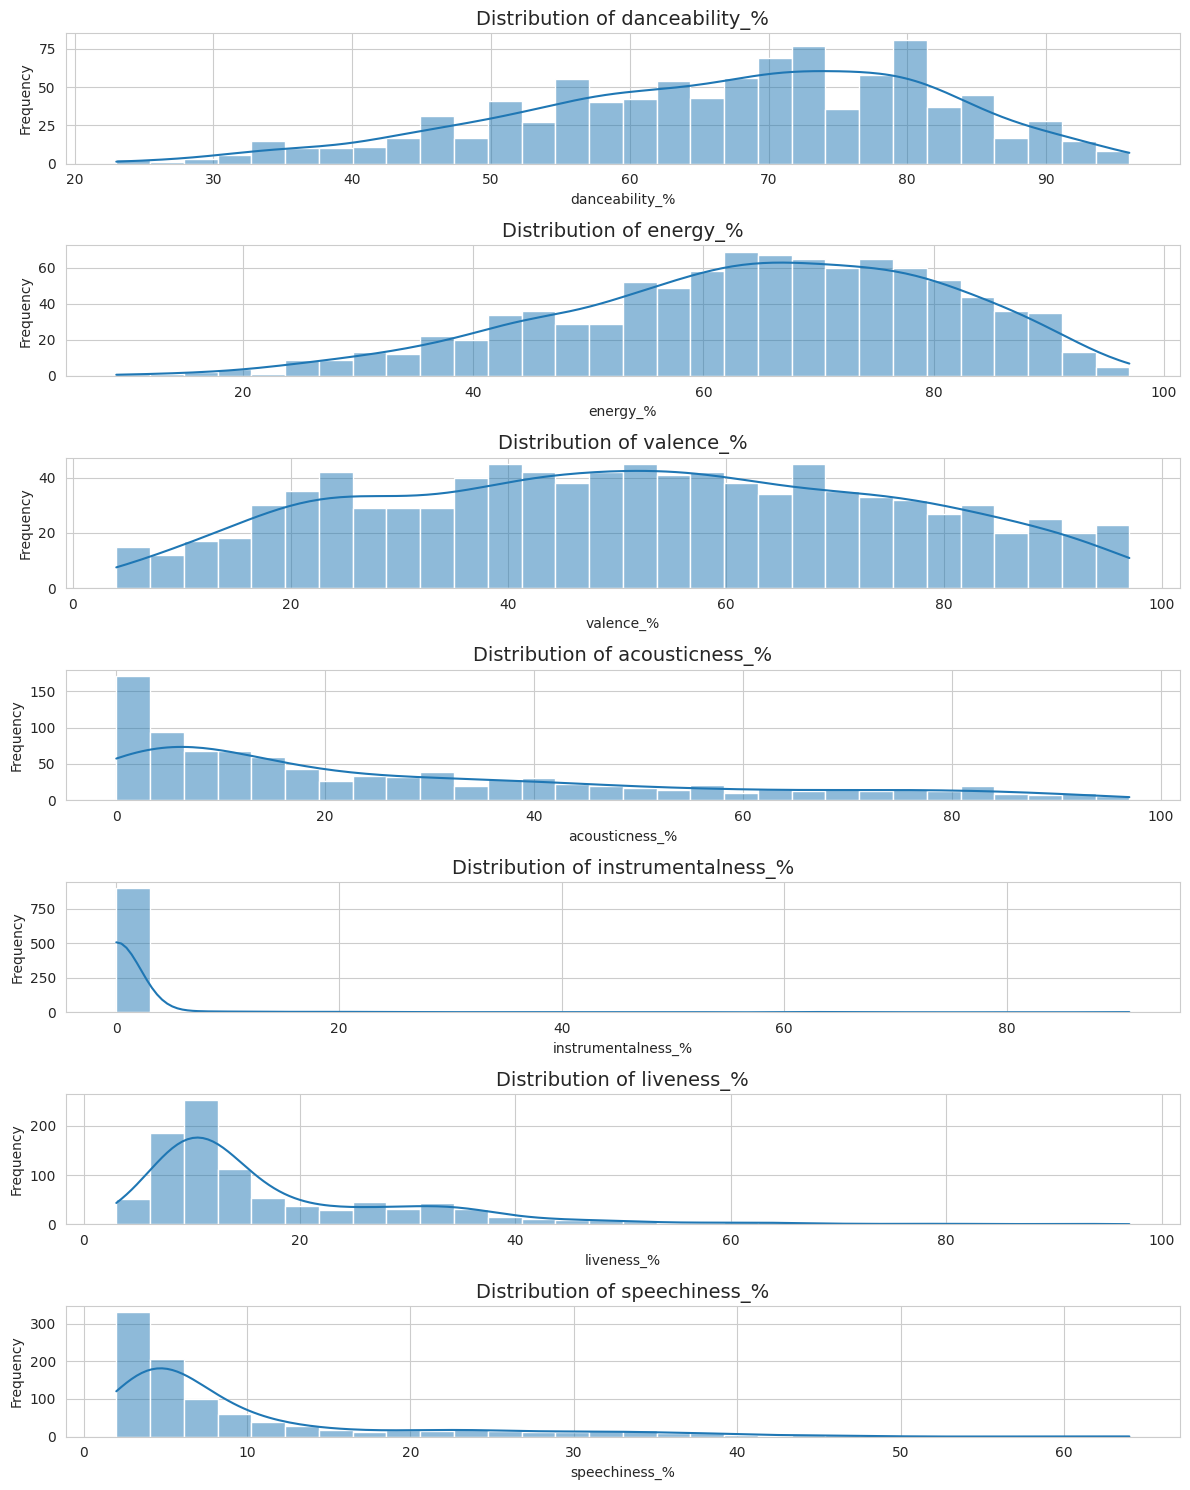

In [7]:
# Setting the aesthetics for the plots
sns.set_style("whitegrid")

# Creating a list of features to visualize
features_to_visualize = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(features_to_visualize), figsize=(12, 15))

# Plotting the distribution for each feature
for i, feature in enumerate(features_to_visualize):
    sns.histplot(spotify_data[feature], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## The top 10 songs based on their presence in Spotify playlists

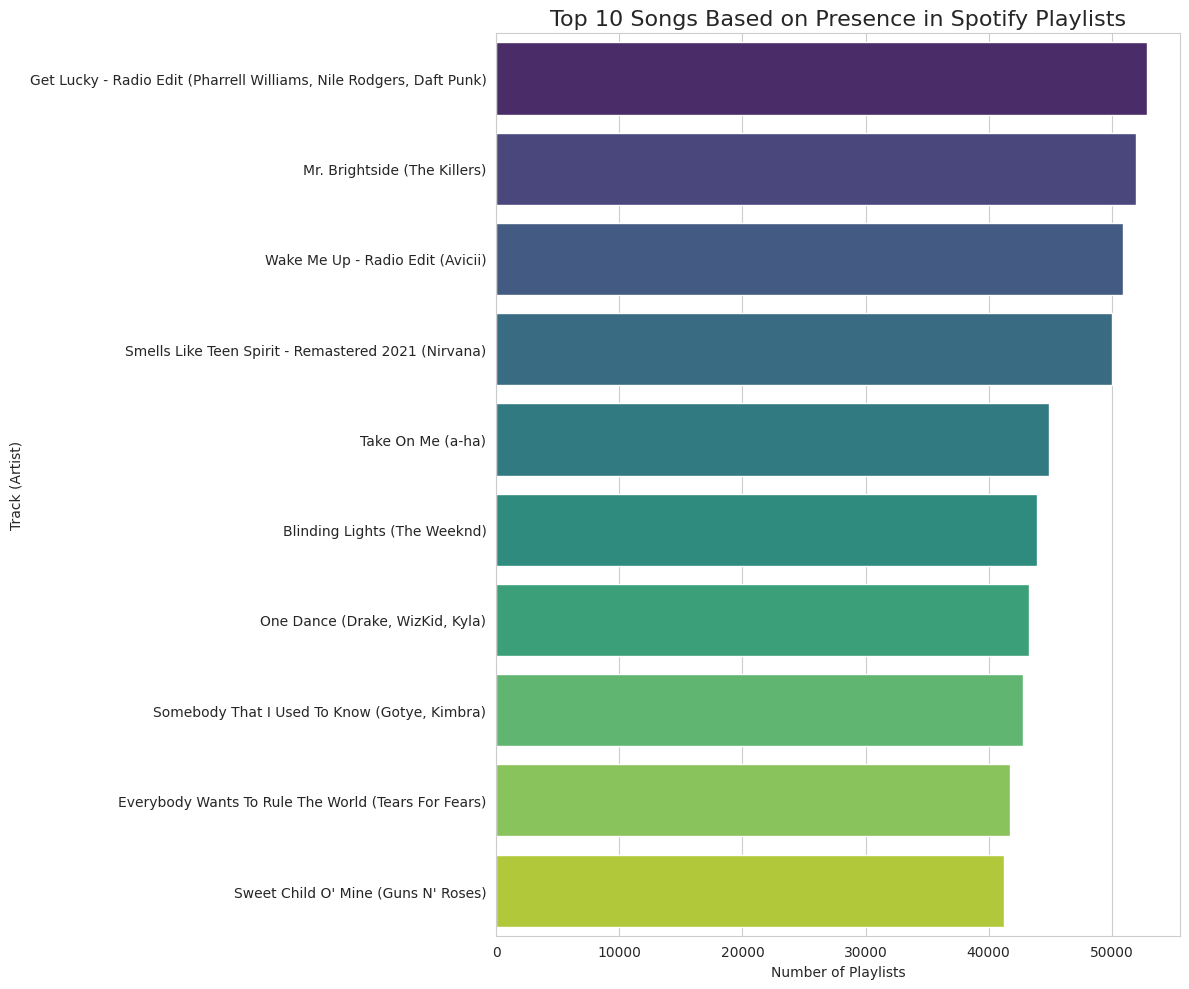

In [8]:
# Selecting the top 10 songs based on their presence in Spotify playlists
top_songs_in_playlists = spotify_data.sort_values(by='in_spotify_playlists', ascending=False).head(10)

# Creating a combined column for track and artist name for better visualization
top_songs_in_playlists['track_artist'] = top_songs_in_playlists['track_name'] + " (" + top_songs_in_playlists['artist(s)_name'] + ")"

# Plotting the songs with artist names
plt.figure(figsize=(12, 10))
sns.barplot(x=top_songs_in_playlists['in_spotify_playlists'], y=top_songs_in_playlists['track_artist'],
            palette="viridis", orient='h')
plt.title('Top 10 Songs Based on Presence in Spotify Playlists', fontsize=16)
plt.xlabel('Number of Playlists')
plt.ylabel('Track (Artist)')
plt.tight_layout()
plt.show()

## Top 10 artists based on total streams

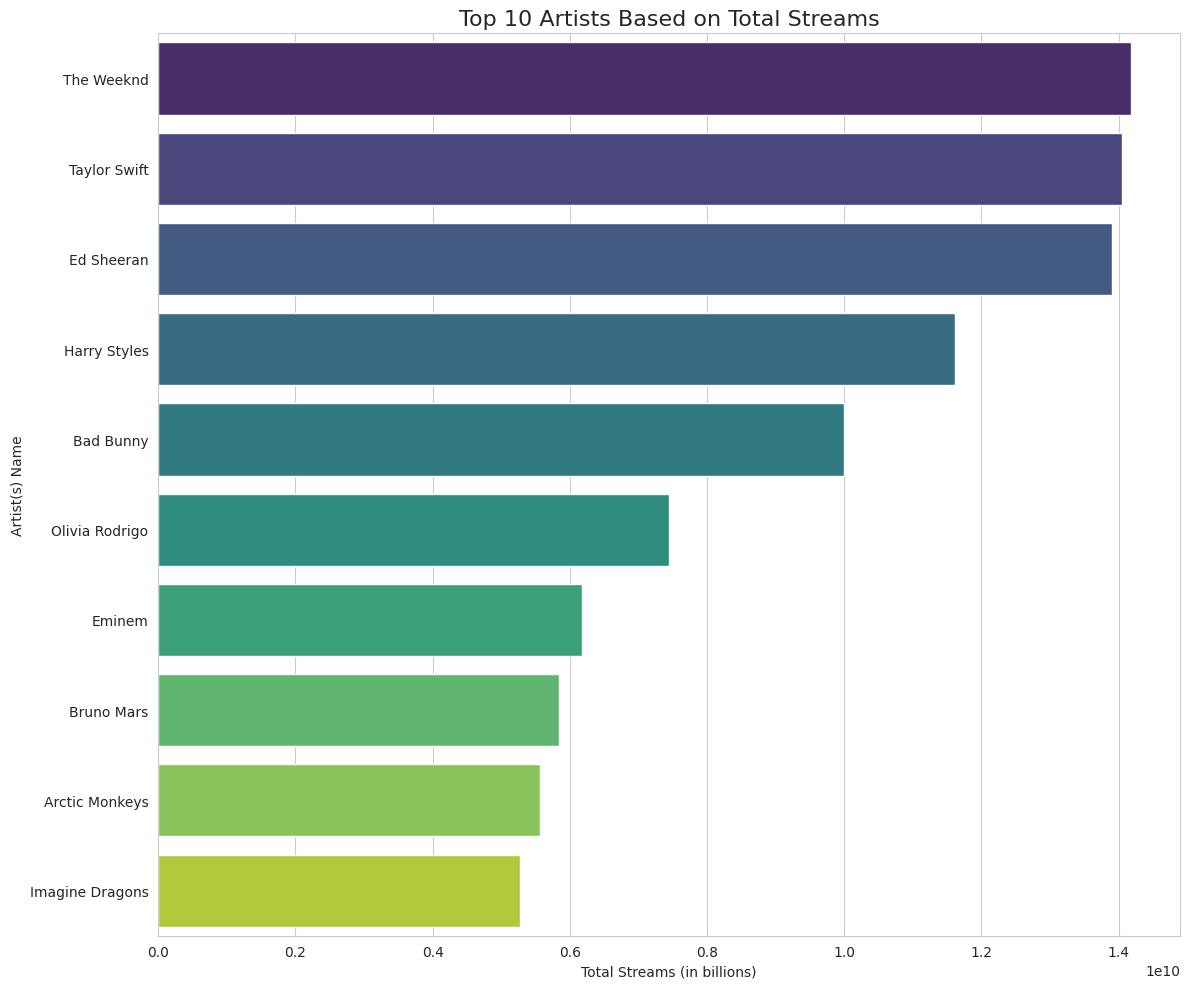

In [9]:
# Converting 'streams' column to numeric data type
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Grouping by artist(s) again and summing up their streams
artist_streams = spotify_data.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Plotting the artists with the most streams again
plt.figure(figsize=(12, 10))
sns.barplot(x=artist_streams.values, y=artist_streams.index, palette="viridis", orient='h')
plt.title('Top 10 Artists Based on Total Streams', fontsize=16)
plt.xlabel('Total Streams (in billions)')
plt.ylabel('Artist(s) Name')
plt.tight_layout()
plt.show()

## Streams vs percentage features

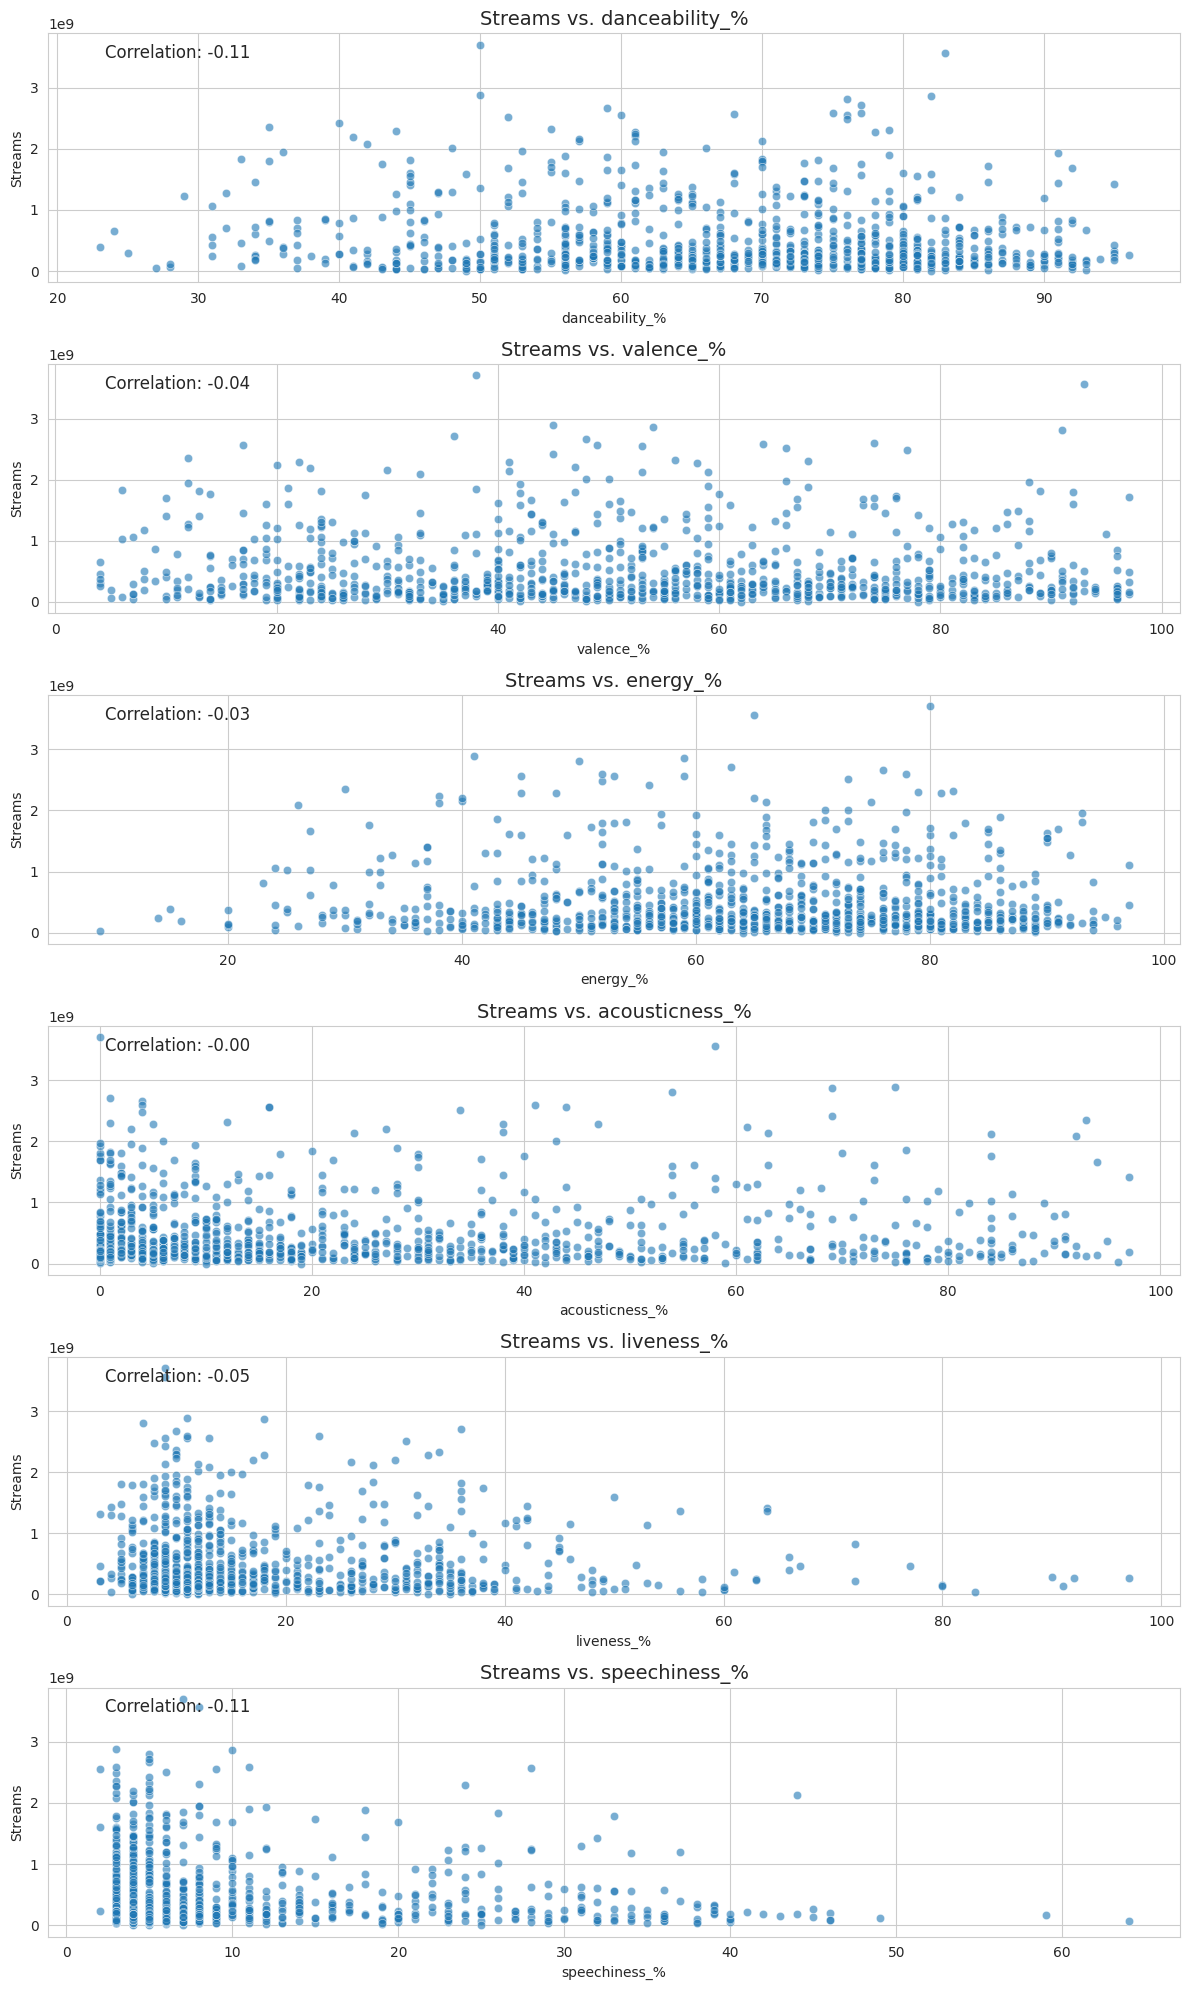

{'danceability_%': -0.10545688369141903,
 'valence_%': -0.040831367495159455,
 'energy_%': -0.026051488364248913,
 'acousticness_%': -0.004484652700684057,
 'liveness_%': -0.04833729577983245,
 'speechiness_%': -0.1123329964033855}

In [10]:
# List of features to compare with streams
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(features), figsize=(12, 20))

# Plotting scatter plots and printing correlation coefficients for each feature
correlations = {}
for i, feature in enumerate(features):
    sns.scatterplot(x=spotify_data[feature], y=spotify_data['streams'], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Streams vs. {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Streams')
    corr = spotify_data['streams'].corr(spotify_data[feature])
    correlations[feature] = corr
    axes[i].annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.show()

correlations

Streams vs. Danceability: A slightly negative correlation (r=−0.105) suggests that tracks with higher danceability tend to have slightly fewer streams, although the relationship is weak.

Streams vs. Valence: A very weak negative correlation (r=−0.041), implying that the mood of the track (from sad to happy) has little influence on the number of streams.

Streams vs. Energy: An even weaker negative correlation (r=−0.026), suggesting that the energy of a track has minimal impact on its streams.

Streams vs. Acousticness: Almost no correlation (r=−0.004), indicating that the acousticness of a track doesn't significantly influence its streams.

Streams vs. Liveness: A weak negative correlation (r=−0.048), suggesting that tracks recorded live might have slightly fewer streams.

Streams vs. Speechiness: A slightly negative correlation (r=−0.112), suggesting that tracks with more spoken words or rap might have slightly fewer streams.

## Percentage features vs top artists

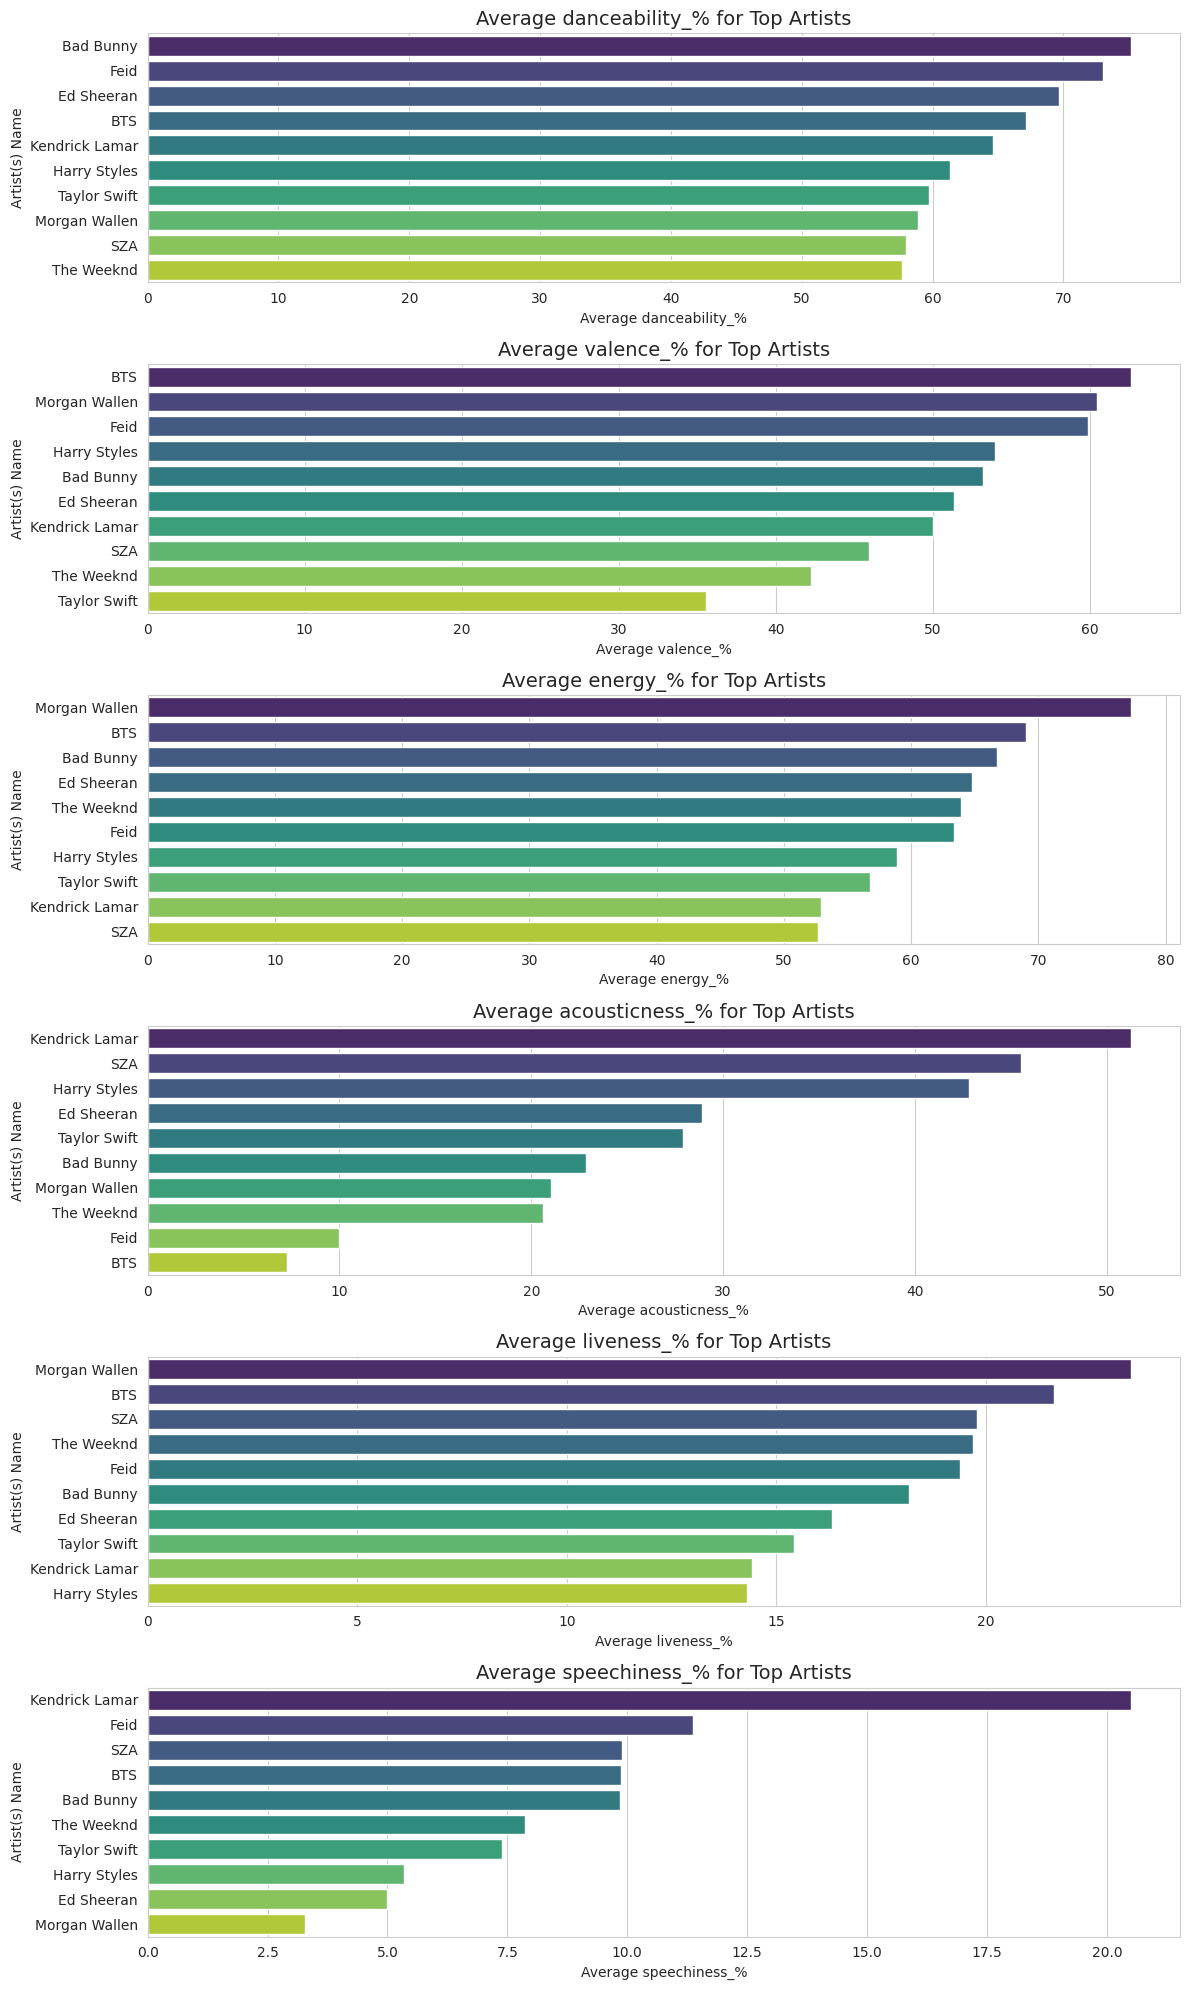

In [11]:
# Selecting the top 10 artists based on the number of songs they have in the dataset
top_artists = spotify_data['artist(s)_name'].value_counts().head(10).index

# Filtering the dataset to include only these top artists
top_artists_data = spotify_data[spotify_data['artist(s)_name'].isin(top_artists)]

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(features), figsize=(12, 20))

# Plotting average values for each feature for the top artists
for i, feature in enumerate(features):
    artist_feature_avg = top_artists_data.groupby('artist(s)_name')[feature].mean().sort_values(ascending=False)
    sns.barplot(x=artist_feature_avg.values, y=artist_feature_avg.index, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Average {feature} for Top Artists', fontsize=14)
    axes[i].set_xlabel(f'Average {feature}')
    axes[i].set_ylabel('Artist(s) Name')

plt.tight_layout()
plt.show()

## Temporal analysis

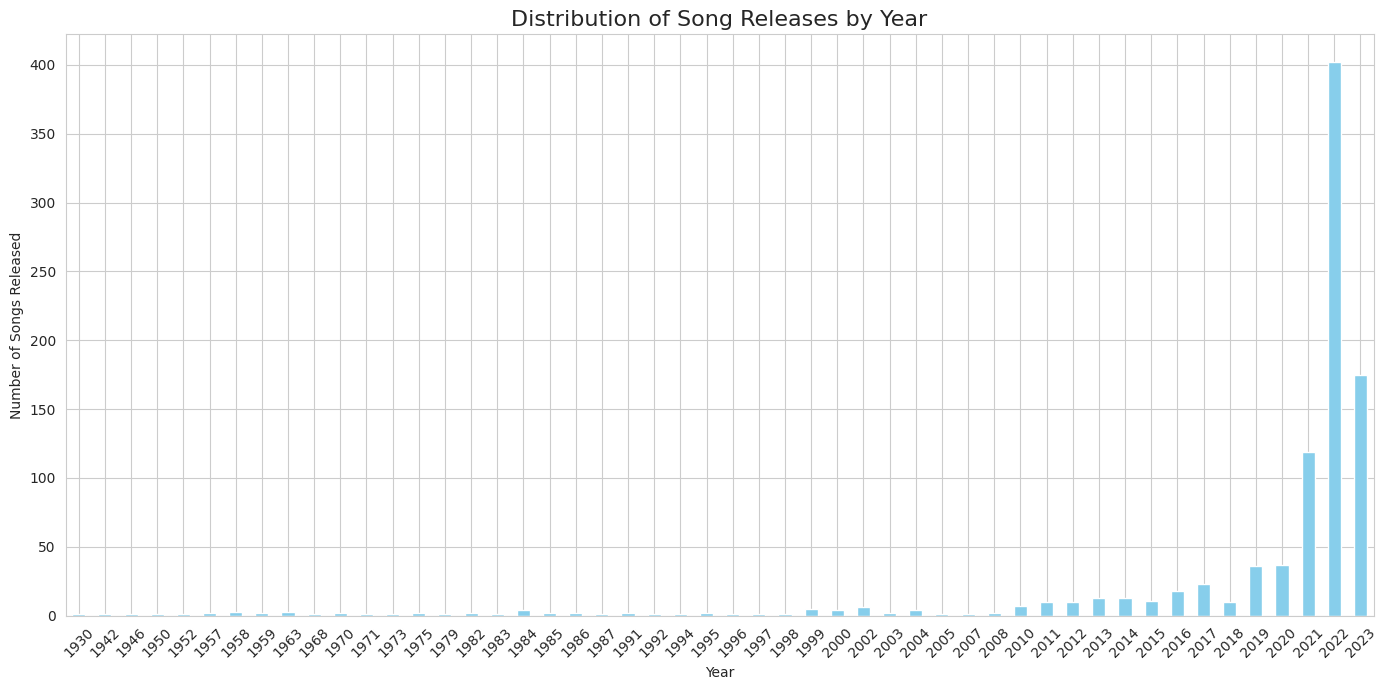

In [12]:
# Checking unique values for 'released_year', 'released_month', and 'released_day'
unique_values = {
    'released_year': spotify_data['released_year'].unique(),
    'released_month': spotify_data['released_month'].unique(),
    'released_day': spotify_data['released_day'].unique()
}


# Creating a 'release_date_string' column
spotify_data['release_date_string'] = spotify_data['released_year'].astype(str) + '-' + \
                                      spotify_data['released_month'].astype(str) + '-' + \
                                      spotify_data['released_day'].astype(str)

# Converting the 'release_date_string' column to datetime data type
spotify_data['release_date'] = pd.to_datetime(spotify_data['release_date_string'], errors='coerce')

# Rechecking the distribution of song releases by year
yearly_releases = spotify_data['release_date'].dt.year.value_counts().sort_index()

# Plotting the distribution of song releases by year
plt.figure(figsize=(14, 7))
yearly_releases.plot(kind='bar', color='skyblue')
plt.title('Distribution of Song Releases by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

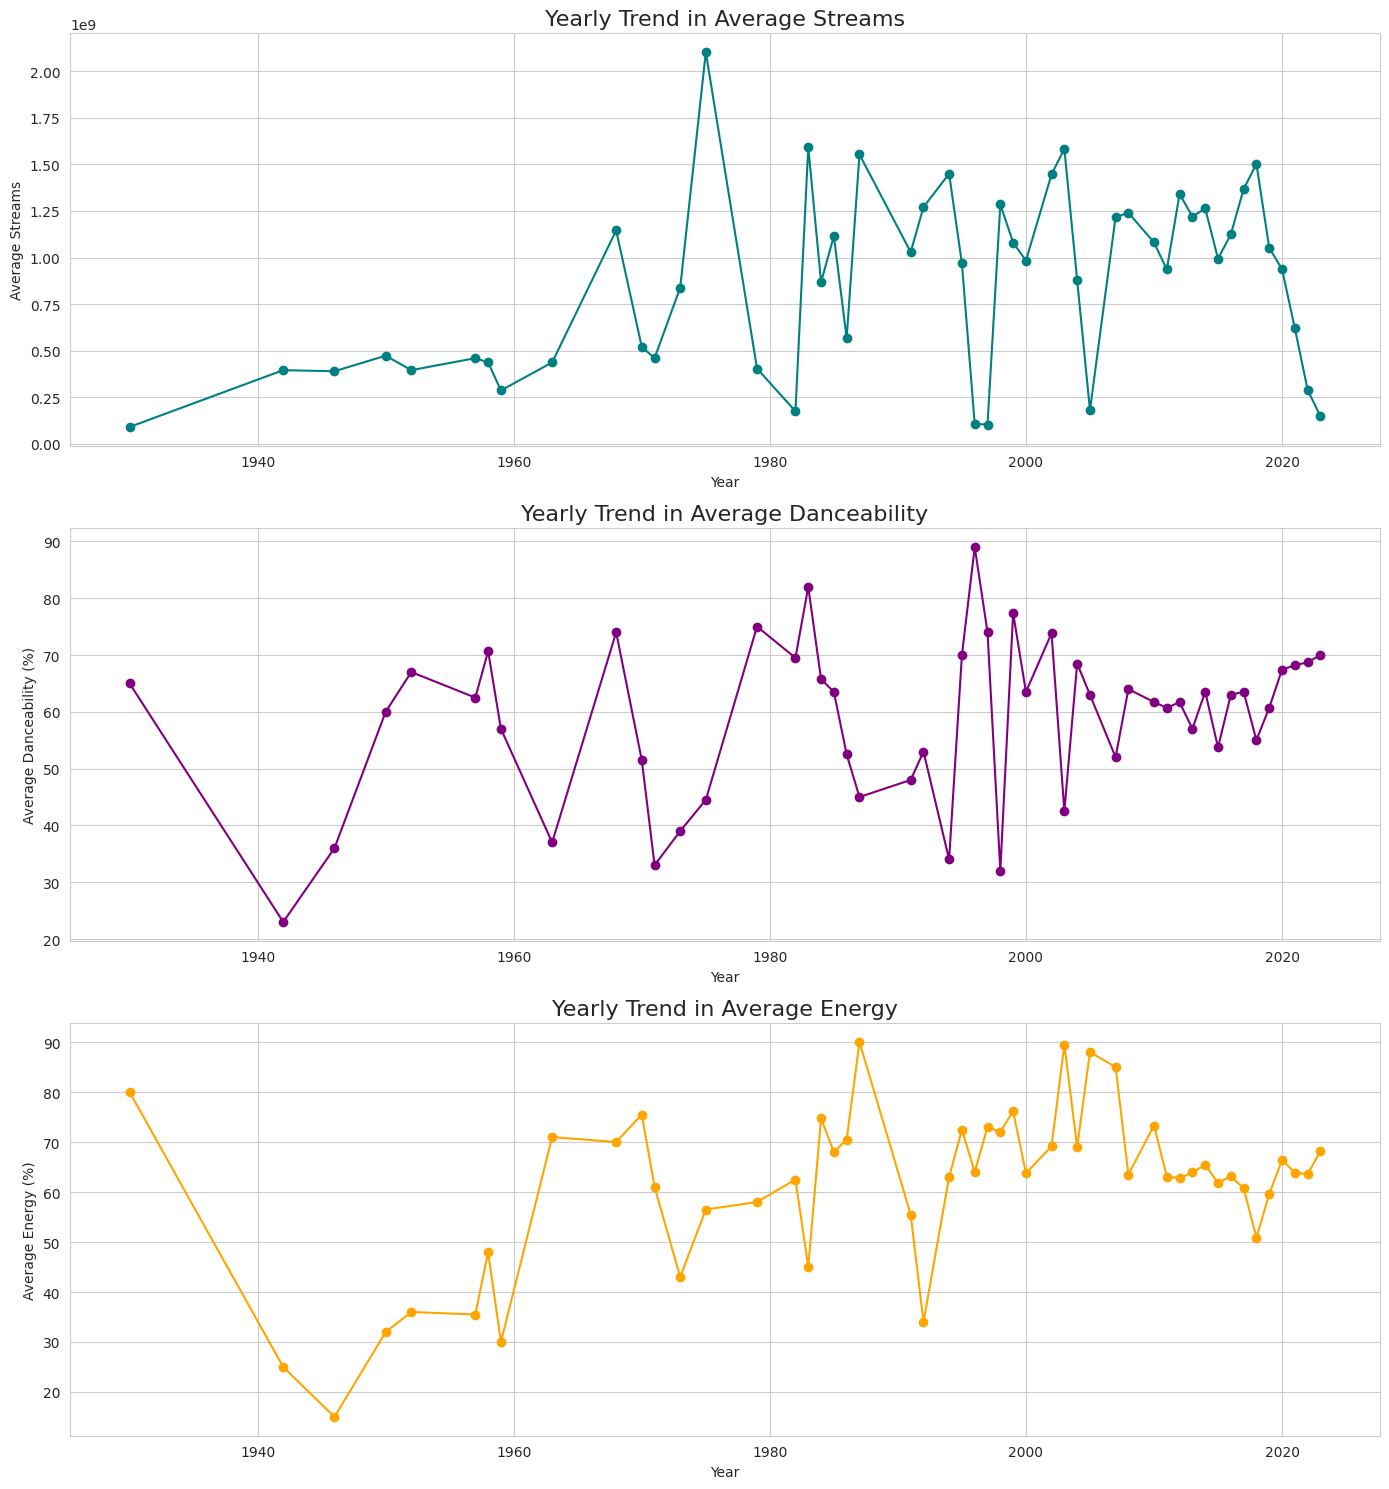

In [13]:
# Calculating yearly averages for streams, danceability, and energy
yearly_averages = spotify_data.groupby(spotify_data['release_date'].dt.year)[['streams', 'danceability_%', 'energy_%']].mean()

# Plotting the yearly trends
fig, axes = plt.subplots(nrows=3, figsize=(14, 15))

# Average Streams by Year
axes[0].plot(yearly_averages.index, yearly_averages['streams'], marker='o', color='teal')
axes[0].set_title('Yearly Trend in Average Streams', fontsize=16)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Streams')
axes[0].grid(True)

# Average Danceability by Year
axes[1].plot(yearly_averages.index, yearly_averages['danceability_%'], marker='o', color='purple')
axes[1].set_title('Yearly Trend in Average Danceability', fontsize=16)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Danceability (%)')
axes[1].grid(True)

# Average Energy by Year
axes[2].plot(yearly_averages.index, yearly_averages['energy_%'], marker='o', color='orange')
axes[2].set_title('Yearly Trend in Average Energy', fontsize=16)
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Energy (%)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Comparison across platforms

In [14]:
spotify_data['in_deezer_playlists']

0       45
1       58
2       91
3      125
4       87
      ... 
948     37
949      8
950      7
951     17
952     32
Name: in_deezer_playlists, Length: 953, dtype: object

In [15]:
spotify_data['in_spotify_playlists']

0       553
1      1474
2      1397
3      7858
4      3133
       ... 
948     953
949    1180
950     573
951    1320
952     782
Name: in_spotify_playlists, Length: 953, dtype: int64

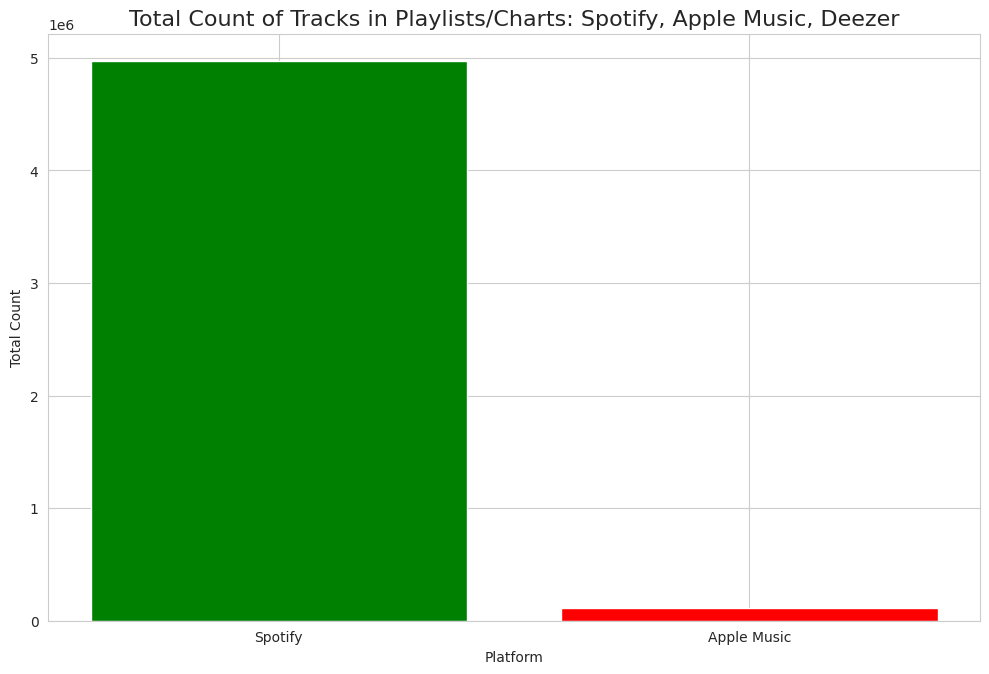

In [16]:
# Calculating the total count of tracks present in playlists/charts for Spotify and Apple Music
total_counts = {
    'Spotify': spotify_data['in_spotify_playlists'].sum() + spotify_data['in_spotify_charts'].sum(),
    'Apple Music': spotify_data['in_apple_playlists'].sum() + spotify_data['in_apple_charts'].sum(),
}

# Plotting the total count comparison for Spotify and Apple Music
plt.figure(figsize=(10, 7))
plt.bar(total_counts.keys(), total_counts.values(), color=['green', 'red'])
plt.title('Total Count of Tracks in Playlists/Charts: Spotify, Apple Music, Deezer', fontsize=16)
plt.ylabel('Total Count')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()


In [17]:
# Identifying top 10 songs for Spotify based on their presence in playlists and charts
top_songs_spotify = spotify_data[['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_spotify_charts']]
top_songs_spotify['spotify_total'] = top_songs_spotify['in_spotify_playlists'] + top_songs_spotify['in_spotify_charts']
top_songs_spotify = top_songs_spotify.sort_values(by='spotify_total', ascending=False).head(10)

# Identifying top 10 songs for Apple Music based on their presence in playlists and charts
top_songs_apple = spotify_data[['track_name', 'artist(s)_name', 'in_apple_playlists', 'in_apple_charts']]
top_songs_apple['apple_total'] = top_songs_apple['in_apple_playlists'] + top_songs_apple['in_apple_charts']
top_songs_apple = top_songs_apple.sort_values(by='apple_total', ascending=False).head(10)

top_songs_spotify

<ipython-input-17-c8e5f7e5efef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_spotify['spotify_total'] = top_songs_spotify['in_spotify_playlists'] + top_songs_spotify['in_spotify_charts']
<ipython-input-17-c8e5f7e5efef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_apple['apple_total'] = top_songs_apple['in_apple_playlists'] + top_songs_apple['in_apple_charts']


,track_name,artist(s)_name,in_spotify_playlists,in_spotify_charts,spotify_total
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",52898,0,52898
630,Mr. Brightside,The Killers,51979,15,51994
720,Wake Me Up - Radio Edit,Avicii,50887,34,50921
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,49991,9,50000
199,Take On Me,a-ha,44927,17,44944
55,Blinding Lights,The Weeknd,43899,69,43968
162,One Dance,"Drake, WizKid, Kyla",43257,24,43281
727,Somebody That I Used To Know,"Gotye, Kimbra",42798,0,42798
114,Everybody Wants To Rule The World,Tears For Fears,41751,25,41776
871,Sweet Child O' Mine,Guns N' Roses,41231,1,41232


In [18]:
top_songs_apple

,track_name,artist(s)_name,in_apple_playlists,in_apple_charts,apple_total
55,Blinding Lights,The Weeknd,672,199,871
620,Dance Monkey,Tones and I,533,167,700
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",537,122,659
407,Don't Start Now,Dua Lipa,532,77,609
14,As It Was,Harry Styles,403,198,601
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",492,99,591
86,Someone You Loved,Lewis Capaldi,440,125,565
127,Watermelon Sugar,Harry Styles,437,115,552
162,One Dance,"Drake, WizKid, Kyla",433,107,540
71,Heat Waves,Glass Animals,386,144,530


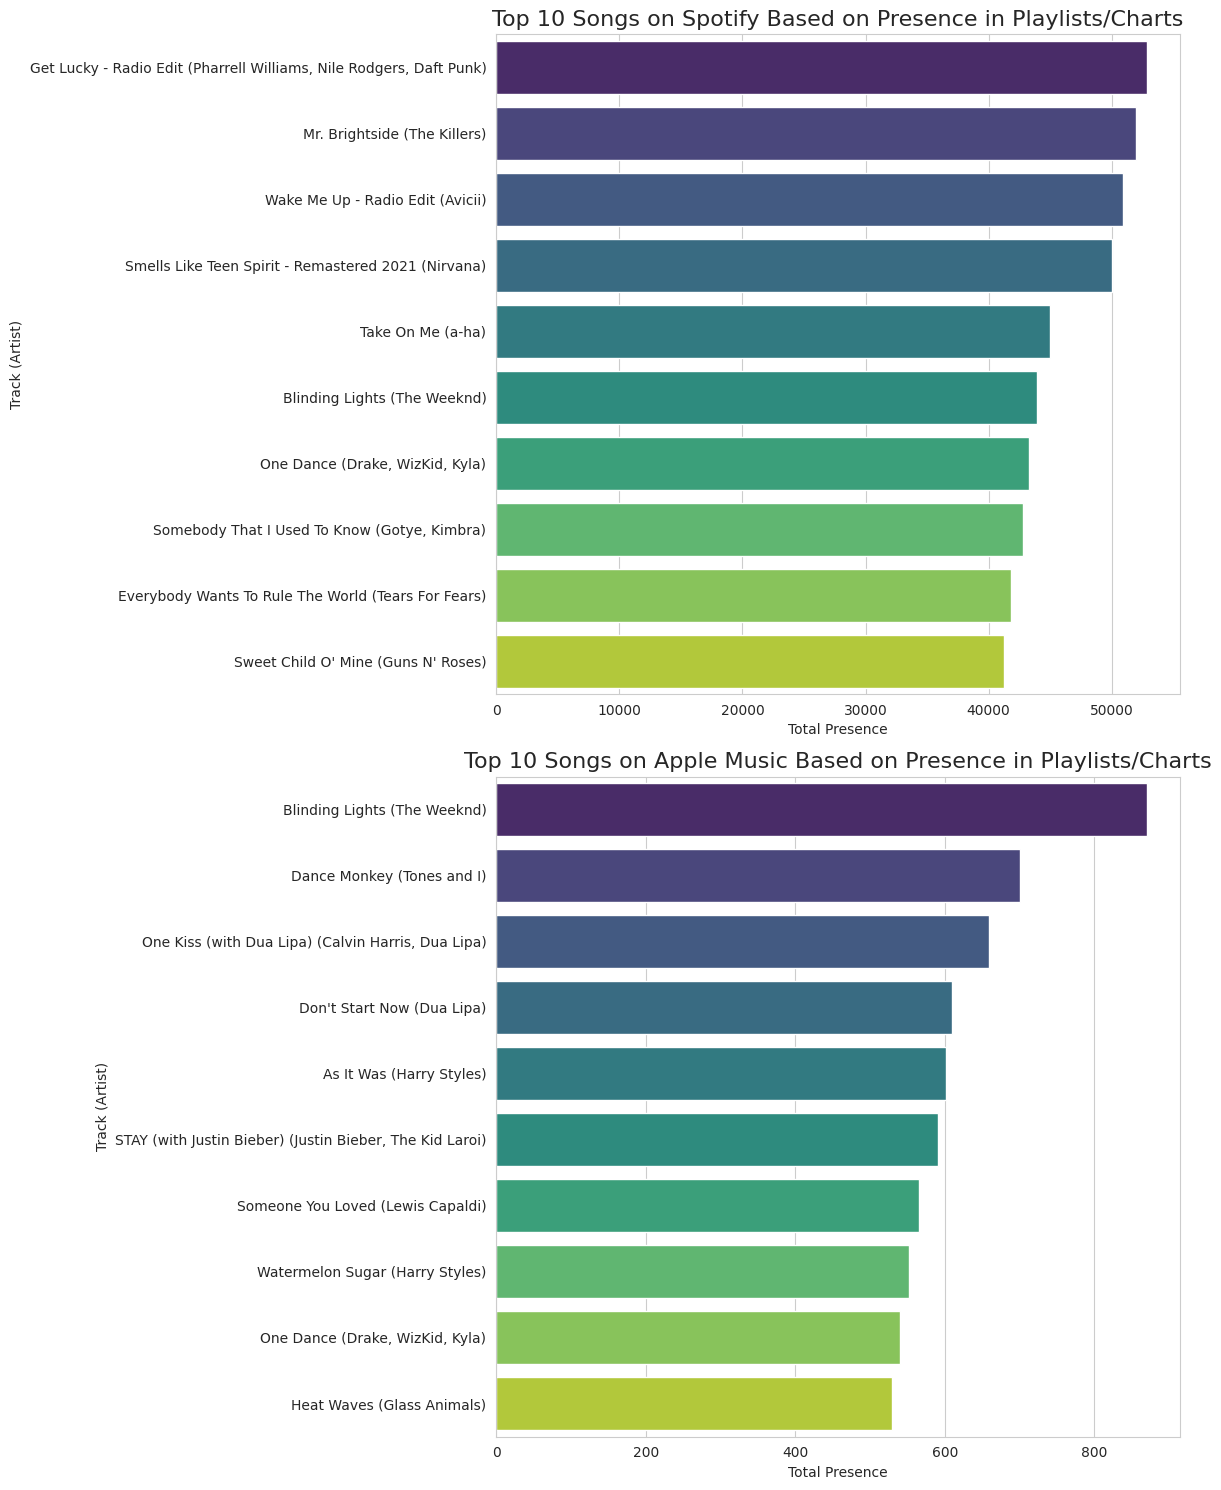

In [19]:
# Setting up the figure and axes
fig, axes = plt.subplots(nrows=2, figsize=(12, 15))

# Plotting the top 10 songs for Spotify
sns.barplot(x=top_songs_spotify['spotify_total'], y=top_songs_spotify['track_name'] + " (" + top_songs_spotify['artist(s)_name'] + ")",
            palette="viridis", ax=axes[0])
axes[0].set_title('Top 10 Songs on Spotify Based on Presence in Playlists/Charts', fontsize=16)
axes[0].set_xlabel('Total Presence')
axes[0].set_ylabel('Track (Artist)')

# Plotting the top 10 songs for Apple Music
sns.barplot(x=top_songs_apple['apple_total'], y=top_songs_apple['track_name'] + " (" + top_songs_apple['artist(s)_name'] + ")",
            palette="viridis", ax=axes[1])
axes[1].set_title('Top 10 Songs on Apple Music Based on Presence in Playlists/Charts', fontsize=16)
axes[1].set_xlabel('Total Presence')
axes[1].set_ylabel('Track (Artist)')

plt.tight_layout()
plt.show()

## Artists collaborations

In [20]:
# Identifying collaborations by splitting the 'artist(s)_name' column
spotify_data['artists_list'] = spotify_data['artist(s)_name'].str.split(', ')

# Filtering out songs that have only one artist to get collaborative tracks
collaborations = spotify_data[spotify_data['artists_list'].apply(len) > 1]

# Displaying the first few rows of the collaborations dataframe
collaborations[['track_name', 'artist(s)_name', 'streams', 'in_spotify_playlists', 'in_spotify_charts']].head()

,track_name,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703.0,553,147
5,Sprinter,"Dave, Central Cee",183706234.0,2186,91
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",725980112.0,3090,50
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",553634067.0,2953,44
10,un x100to,"Bad Bunny, Grupo Frontera",505671438.0,2876,40


<ipython-input-21-f4612ac86a25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collaborations['artist_combinations'] = collaborations['artists_list'].apply(get_artist_combinations)


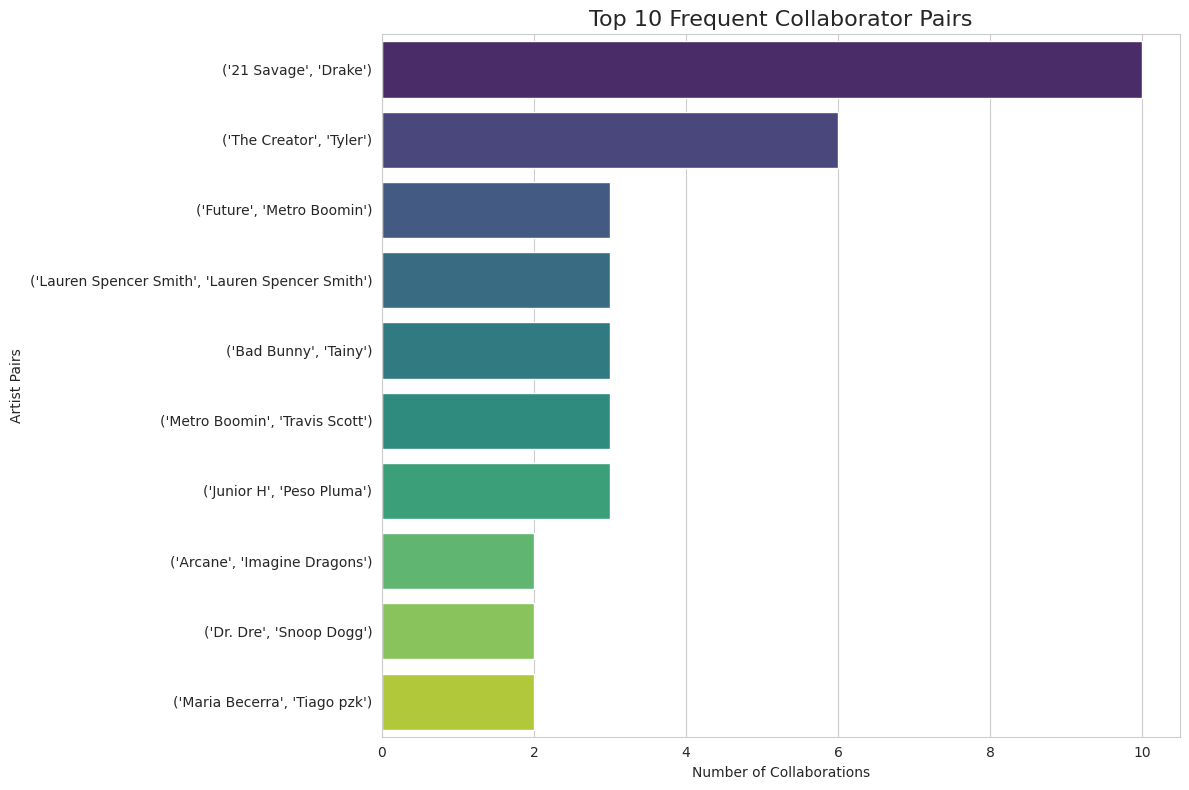

In [21]:
# Function to get all combinations of artists for each track
def get_artist_combinations(artists_list):
    return list(combinations(sorted(artists_list), 2))

# Apply the function to the 'artists_list' column to get all artist combinations
collaborations['artist_combinations'] = collaborations['artists_list'].apply(get_artist_combinations)

# Flatten the list of artist combinations to count the frequency of each combination
all_combinations = [combo for sublist in collaborations['artist_combinations'] for combo in sublist]
frequent_collaborators = pd.Series(all_combinations).value_counts().head(10)

# Plotting the top 10 frequent collaborator pairs
plt.figure(figsize=(12, 8))
sns.barplot(x=frequent_collaborators.values, y=frequent_collaborators.index, palette="viridis")
plt.title('Top 10 Frequent Collaborator Pairs', fontsize=16)
plt.xlabel('Number of Collaborations')
plt.ylabel('Artist Pairs')
plt.tight_layout()
plt.show()

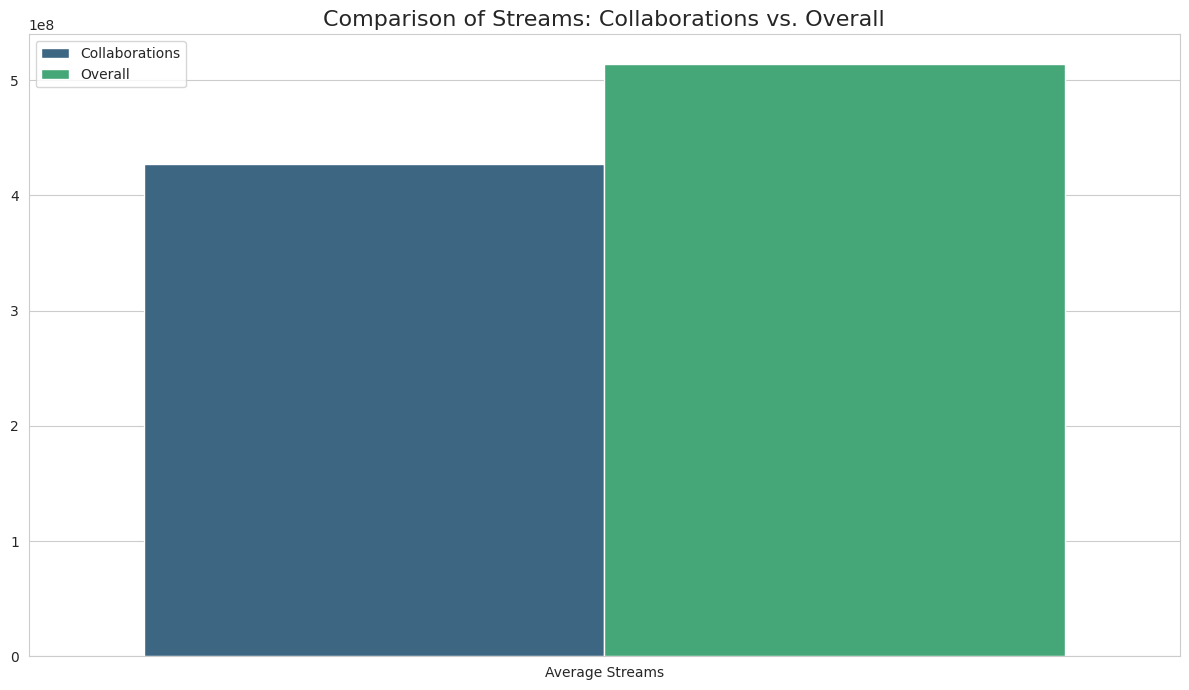

In [22]:
# Calculating average streams and presence in playlists for collaborative tracks
collab_avg_streams = collaborations['streams'].mean()

# Calculating average streams and presence in playlists for all tracks
overall_avg_streams = spotify_data['streams'].mean()

# Creating a DataFrame to visualize the comparison
data = {
    'Metrics': ['Average Streams'],
    'Collaborations': [collab_avg_streams],
    'Overall': [overall_avg_streams]
}
comparison_df = pd.DataFrame(data).melt(id_vars=['Metrics'], value_vars=['Collaborations', 'Overall'])

# Plotting the comparison
plt.figure(figsize=(12, 7))
sns.barplot(x='Metrics', y='value', hue='variable', data=comparison_df, palette="viridis")
plt.title('Comparison of Streams: Collaborations vs. Overall', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='')
plt.tight_layout()
plt.show()

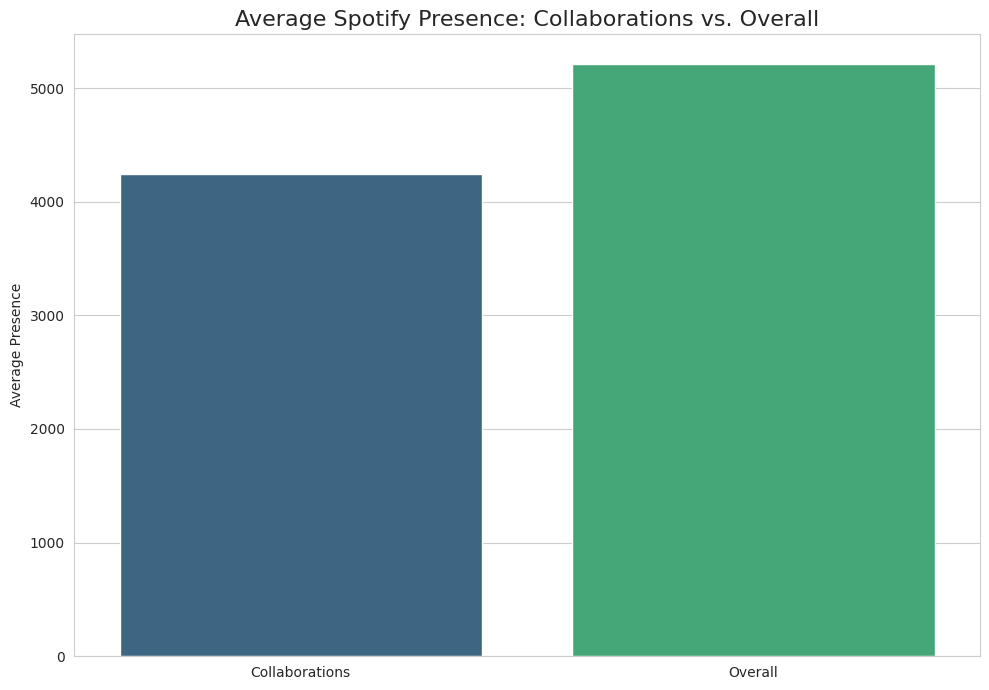

In [23]:
# Recalculating the average Spotify presence for collaborative tracks and overall tracks
collab_avg_spotify_presence = (collaborations['in_spotify_playlists'] + collaborations['in_spotify_charts']).mean()
overall_avg_spotify_presence = (spotify_data['in_spotify_playlists'] + spotify_data['in_spotify_charts']).mean()

# Plotting the comparison for Average Spotify Presence
labels = ['Collaborations', 'Overall']
values = [collab_avg_spotify_presence, overall_avg_spotify_presence]

plt.figure(figsize=(10, 7))
sns.barplot(x=labels, y=values, palette="viridis")
plt.title('Average Spotify Presence: Collaborations vs. Overall', fontsize=16)
plt.ylabel('Average Presence')
plt.tight_layout()
plt.show()

# Regression

In [44]:
# Convert "streams" to numeric, if possible, and drop rows with any null values
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')
spotify_data = spotify_data.dropna()

# Check the info again to confirm the changes
spotify_data.info(), spotify_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            816 non-null    object 
 1   artist(s)_name        816 non-null    object 
 2   artist_count          816 non-null    int64  
 3   released_year         816 non-null    int64  
 4   released_month        816 non-null    int64  
 5   released_day          816 non-null    int64  
 6   in_spotify_playlists  816 non-null    int64  
 7   in_spotify_charts     816 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    816 non-null    int64  
 10  in_apple_charts       816 non-null    int64  
 11  in_deezer_playlists   816 non-null    object 
 12  in_deezer_charts      816 non-null    int64  
 13  in_shazam_charts      816 non-null    object 
 14  bpm                   816 non-null    int64  
 15  key                   8

(None,
                             track_name    artist(s)_name  artist_count  \
 0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
 1                                 LALA       Myke Towers             1   
 2                              vampire    Olivia Rodrigo             1   
 3                         Cruel Summer      Taylor Swift             1   
 4                       WHERE SHE GOES         Bad Bunny             1   
 
    released_year  released_month  released_day  in_spotify_playlists  \
 0           2023               7            14                   553   
 1           2023               3            23                  1474   
 2           2023               6            30                  1397   
 3           2019               8            23                  7858   
 4           2023               5            18                  3133   
 
    in_spotify_charts      streams  in_apple_playlists  ...  bpm key   mode  \
 0                147 

In [45]:
from sklearn.model_selection import train_test_split

# Identify numeric columns (excluding 'streams')
predictor_columns = spotify_data.select_dtypes(include=['int64', 'float64']).columns
predictor_columns = predictor_columns.drop('streams')  # remove target variable

# Select only numeric columns for predictors and target
X = spotify_data[predictor_columns]
y = spotify_data['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

predictor_columns.tolist()


['artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_charts',
 'bpm',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

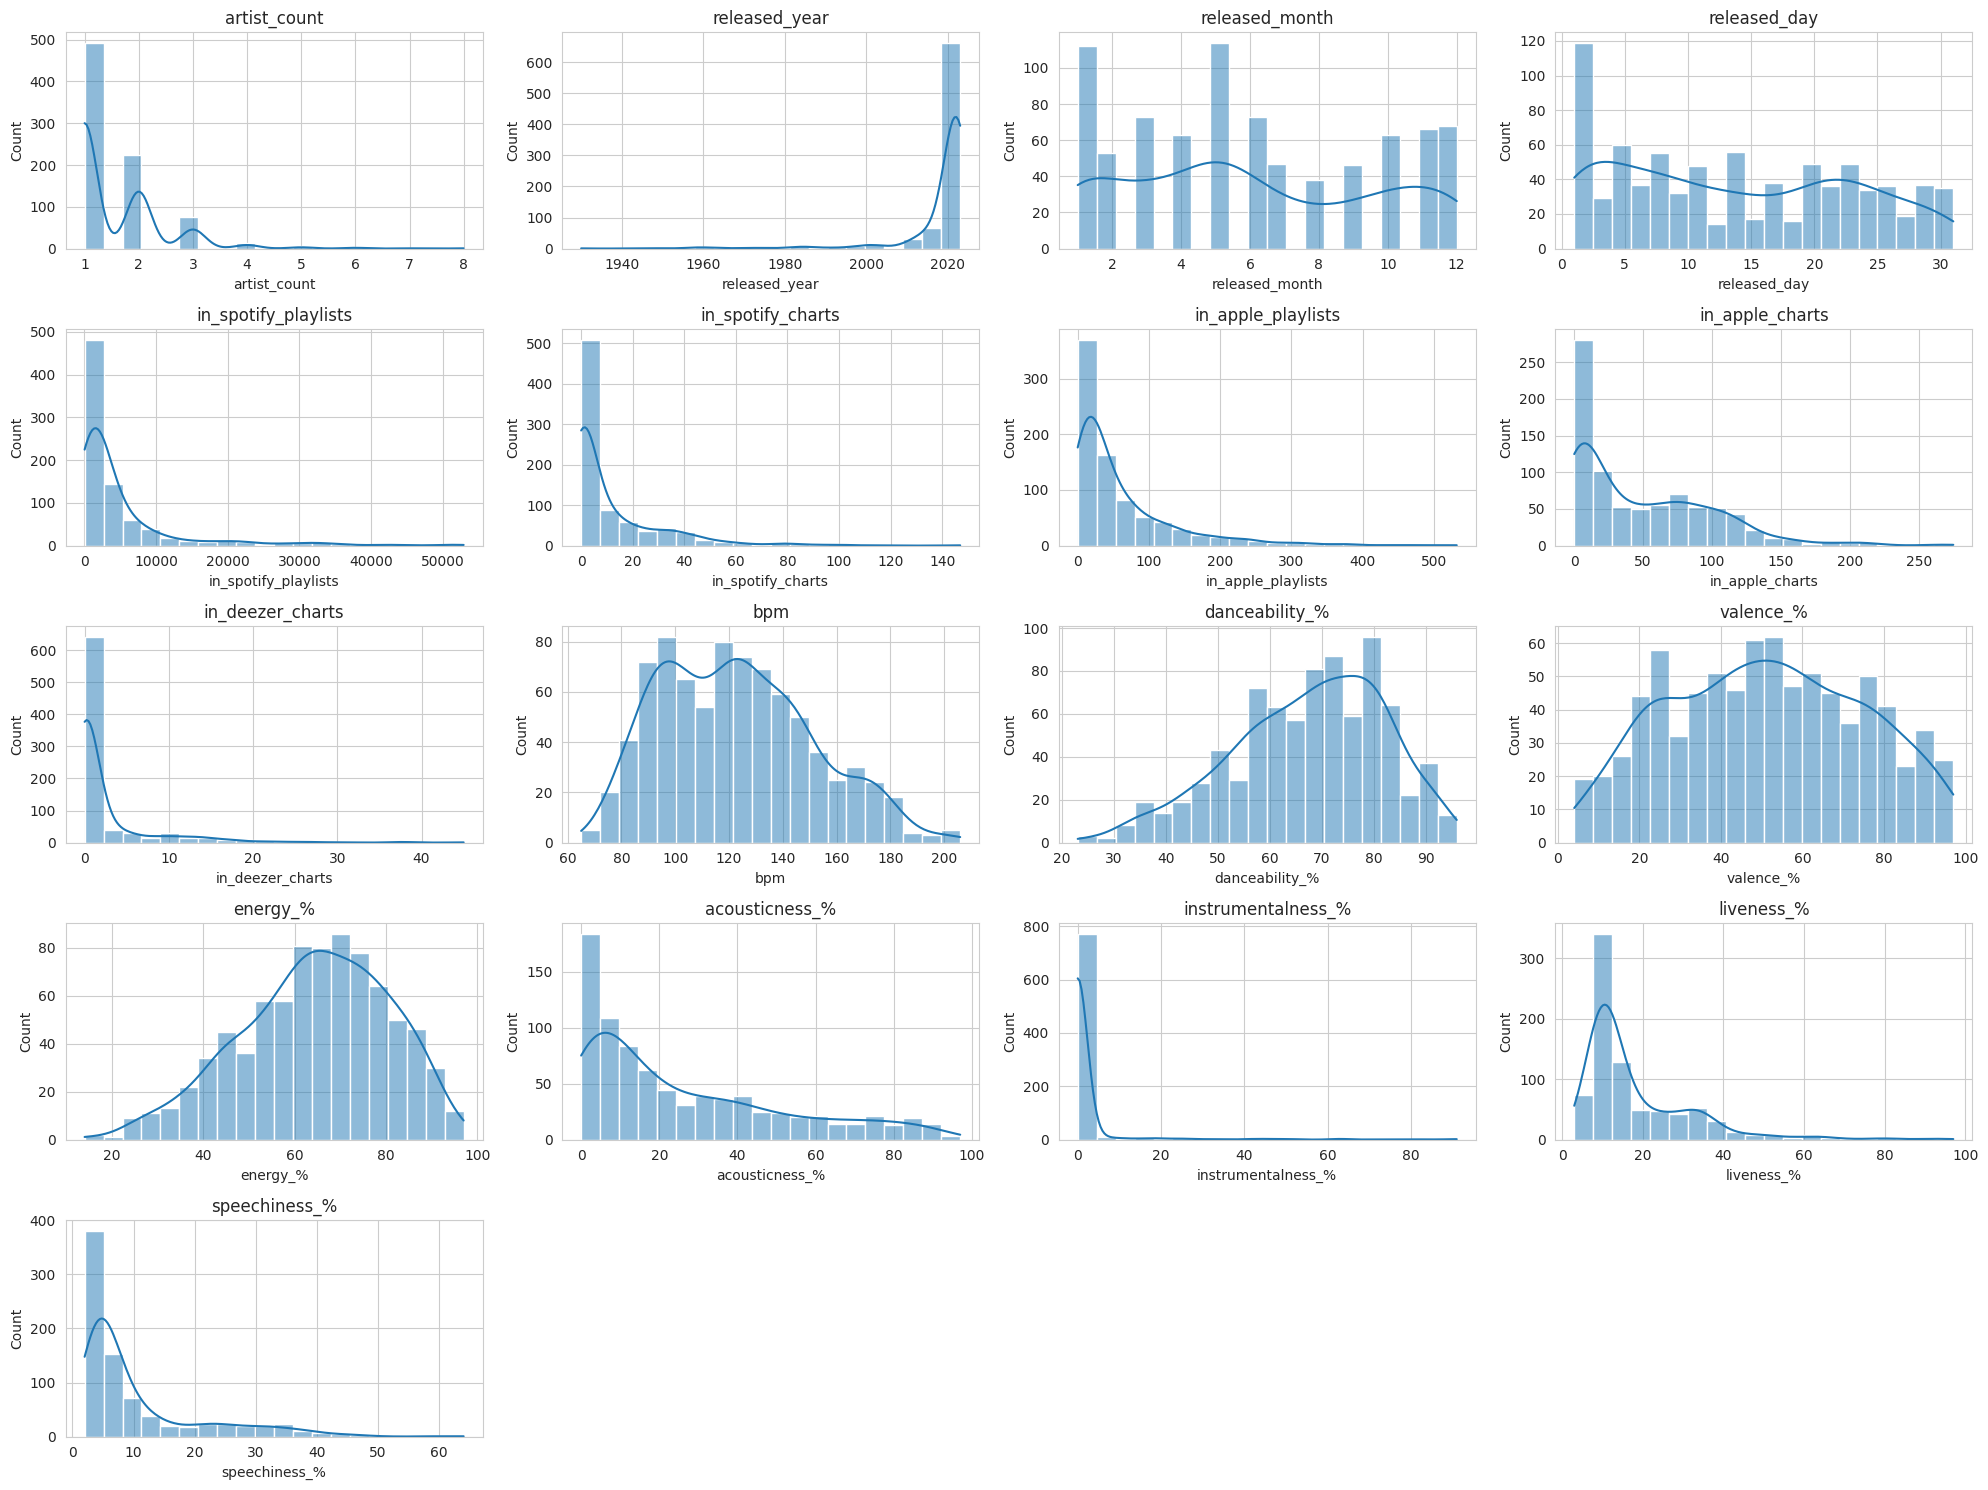

{'artist_count': 3.6098168147898565e-37,
 'released_year': 2.802596928649634e-45,
 'released_month': 1.5353477710416328e-19,
 'released_day': 9.368337425045884e-19,
 'in_spotify_playlists': 5.620608140406841e-40,
 'in_spotify_charts': 1.7352212966654448e-36,
 'in_apple_playlists': 2.9876270289115697e-34,
 'in_apple_charts': 4.343563793531649e-25,
 'in_deezer_charts': 2.8922800303664224e-42,
 'bpm': 1.0891199747620206e-10,
 'danceability_%': 1.3147760657972185e-09,
 'valence_%': 7.62647944796413e-10,
 'energy_%': 6.18543083419354e-08,
 'acousticness_%': 1.53763473420757e-25,
 'instrumentalness_%': 0.0,
 'liveness_%': 3.269371875088907e-32,
 'speechiness_%': 1.859492013869218e-34}

In [46]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

# Results of Shapiro tests
shapiro_results = {}

# Plotting histograms and performing Shapiro-Wilk test for normality
plt.figure(figsize=(20, 15))

for i, col in enumerate(predictor_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(X[col], kde=True, bins=20)
    plt.title(col)

    # Shapiro-Wilk test
    stat, p_value = shapiro(X[col])
    shapiro_results[col] = p_value

plt.tight_layout()
plt.show()

# Display p-values from Shapiro-Wilk test
shapiro_results


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a model and fit it
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Coefficients
coefficients = dict(zip(X_train.columns, model.coef_))

rmse, r2, coefficients


(275993813.0943825,
 0.75157481880364,
 {'artist_count': -27724321.749177035,
  'released_year': 3110738.4661089457,
  'released_month': 4175711.306977617,
  'released_day': 1163100.0154431418,
  'in_spotify_playlists': 36177.1648609436,
  'in_spotify_charts': 2848965.9060027758,
  'in_apple_playlists': 2845372.2583155776,
  'in_apple_charts': -215114.43447145738,
  'in_deezer_charts': -3877951.063536909,
  'bpm': -253542.15138672027,
  'danceability_%': -769451.9348654704,
  'valence_%': 24179.253719913526,
  'energy_%': -1328856.3552187323,
  'acousticness_%': 837347.7735396004,
  'instrumentalness_%': -669515.8264984445,
  'liveness_%': 588632.4215995889,
  'speechiness_%': -815143.6072338939})

In [48]:
# Removing the non-relevant variables
relevant_predictor_columns = [col for col in predictor_columns if col not in {
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
    'in_apple_charts', 'in_deezer_charts'
}]

# Select only relevant predictor columns
X_relevant = spotify_data[relevant_predictor_columns]

# Split the data into training and testing sets (relevant predictors only)
X_train_rel, X_test_rel, y_train_rel, y_test_rel = train_test_split(
    X_relevant, y, test_size=0.2, random_state=42
)

# Create a model and fit it
model_rel = LinearRegression()
model_rel.fit(X_train_rel, y_train_rel)

# Predictions
y_pred_rel = model_rel.predict(X_test_rel)

# Calculate metrics
rmse_rel = np.sqrt(mean_squared_error(y_test_rel, y_pred_rel))
r2_rel = r2_score(y_test_rel, y_pred_rel)

# Coefficients
coefficients_rel = dict(zip(X_train_rel.columns, model_rel.coef_))

rmse_rel, r2_rel, coefficients_rel

(544931461.473644,
 0.031542232119492364,
 {'bpm': -631847.1572831814,
  'danceability_%': -2505404.7732133623,
  'valence_%': 100497.19819742325,
  'energy_%': -1263116.1732111094,
  'acousticness_%': -299290.71217863413,
  'instrumentalness_%': -3360208.647439338,
  'liveness_%': -1542890.2553177245,
  'speechiness_%': -4450864.965936103})

In [52]:
# Fit the Random Forest model using only the relevant predictors
rf_rel = RandomForestRegressor(n_estimators=100, random_state=42)
rf_rel.fit(X_relevant, y)

# Get feature importances for the relevant predictors
feature_importances_rel = rf_rel.feature_importances_

# Create a dictionary of feature importances and sort it
fi_dict_rel = dict(zip(X_relevant.columns, feature_importances_rel))
sorted_fi_rel = sorted(fi_dict_rel.items(), key=lambda x: x[1], reverse=True)

sorted_fi_rel

[('valence_%', 0.1692191275229243),
 ('bpm', 0.16906766240949445),
 ('acousticness_%', 0.15059253918032592),
 ('danceability_%', 0.14175208849645093),
 ('energy_%', 0.12601420634583702),
 ('speechiness_%', 0.12055195737284728),
 ('liveness_%', 0.11313965235151016),
 ('instrumentalness_%', 0.009662766320609948)]

In [53]:
y_pred = rf_rel.predict(X_relevant)
residuals = y - y_pred

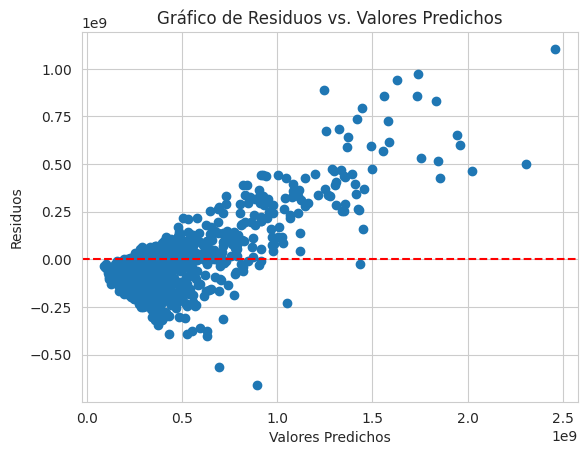

In [54]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # adds a horizontal line at zero
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()
